# All settings will be given to the channel 1 output, in the DC Amp out configuration

In [ ]:
%matplotlib inline 

In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib
import matplotlib.pyplot as plt
import pyvisa as visa
from matplotlib import animation
from time import sleep
from matplotlib.animation import FuncAnimation
#Importing the functions from the module and the pulses dictionaries
from Sweeping import *
from Dictionaries import *
from PulseFiles import *
from Instrument import * 

# Visa interface for the M8190A instrument:

In [3]:
M8190A = VisaR(AWG_Settings2,60000)

In [17]:
Initialization(M8190A,AWG_Settings2)

Instruments Sampling Frecuency set to 5.00000000000000E+08Hz
Instruments DC1 Output Voltage set to 3.00000000000000E-01deciVolts


In [16]:
M8190A.write('*RST')

5

In [5]:
M8190A.query('FREQ:RAST?')

'5.00000000000000E+08'

In [ ]:
M8190A.query('SYST:ERR?')

In [6]:
print(M8190A)

TCPIPInstrument at TCPIP0::ibn3-036.ibn-net.kfa-juelich.de::hislip0::INSTR


In [9]:
DataFramesPSscheme, DataFramesPSschemes2 , timeinterval = Sequence_Loader(PScheme,PScheme2,5,15,7500000,2,4,M8190A,AWG_Settings2,1,15)

Sequence loaded with the following segment data "1,1,0,1,0,7499999,2,1,0,1,0,7499999"
Sequence loaded with the following segment data "1,1,0,1,0,7499999,2,1,0,1,0,7499999"
Sequence loaded with the following segment data "1,1,0,1,0,7499999,2,1,0,1,0,7499999"
57.86038064956665


In [6]:
M8190A.write('ABOR')

5

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

import time



start = time.time()



seq_duration = 30.0 # in sec

pulse_duration = 5.0 # in sec

pulse_start_time = 1.0 # in sec

amplitude = 25.0 # in meV



points = int(1e7)

timex = np.linspace(0, seq_duration, points)

pulse = np.zeros(points)

# print(len(pulse))



pulse_start_point = int(points/seq_duration * pulse_start_time)

pulse_end_point = int(points/seq_duration * (pulse_start_time+pulse_duration))



pulse[pulse_start_point:pulse_end_point] = amplitude



end = time.time()

duration = end - start



print('Elapsed time (s): {:.4f}'.format(duration))



plt.figure()

plt.plot(timex, pulse, label='Points: {}\nElapsed time (s): {:.4f}'.format(points, duration))

plt.xlabel('Time (s)')

plt.ylabel('Amplitude (mV)')

plt.legend()

plt.show()


In [40]:
def sweepfastpulse(Pulse,P,p,t,N):
    
    """Sweeping function for a single pulse with respect of time and duration.

    This function takes the Amplitude, Start and End time, Start and End and Duration of the Pulse dictionary.
    Given a total number of points P, it calcultes the time step dt and the duration step dτ depending on 
    the values of 'Sweep Duration' and 'Sweep time' keys. 
    It then calculates the pulse shape up to the given p point at a time t.
    
    If both of the sweeping keys are equal to zero, it just gives the puls shape at 'Starting time' with 'Starting Duration' at     time t
    """
    time=np.linspace(0,t,N)
    #Pulse array
    pul=np.copy(time)

    if 0 <= p <= P:
        
        if Pulse['Sweep time'] == 0:
            dt = 0

        #Sweeping with respect to time
        if Pulse['Sweep time'] == 1:
            dt = (Pulse['End time'] - Pulse['Start time'])/P
            

        if Pulse['Sweep Duration'] == 0:
            dτ = 0

        #Sweeping with respect to Duration
        if Pulse['Sweep Duration'] == 1:
            dτ = (Pulse['End Duration'] - Pulse['Start Duration'])/P
            


        new_start, new_duration = p * dt + Pulse['Start time'], p * dτ + Pulse['Start Duration']
        new_end = new_duration + new_start
    
        pul[pul <= new_start] = 0
        pul[pul >= new_end] = 0
        pul[pul !=0] = Pulse['Amplitude']         
          
        return pul
    
    else:
        print('p must be in the interval',[0,P])

In [65]:
def SweepFastPulseList(PulList,P,p,t,N):
    
    """Function that perfoms or not a Sweep, depending on the Sweep dictionary keys, for the Pulse Scheme PulList.
    
    This function is a generalization of the sweep0(Pulse,P,p,t).
    It calls it and maps it over every Pulse in the list of pulses PulList.
    If two pulses overlap, their amplitude is added up.
    P gives the number of sample points for the overal pulse scheme, not to be confused with dt, the sweeping time step given by P
    The pulse sequence is generated in the order that the pulses have within the PulseList.
    """
    
    #time interval
    time = np.linspace(-1e-10,t,N)
    
    #Each pulse will be an array, and an entry of a bigger array (we have an array of arrays)
    pularray=np.array([sweepslice(Pulse,P,p,t,N) for Pulse in Pulses_List])
        
    #the final pulse scheme will be the overlap of each individual pulse, given by the sum of their arrays    
    pulscheme = np.sum(pularray,0)
    
        
    return pulscheme, time

In [70]:
start=time.time()

pol, timm =SweepFastPulseList(Pulses_List,10,10,30,10000000)

end = time.time()

comptime =end - start

In [72]:
pol1, timm =SweepFastPulseList(Pulses_List,10,5,30,10000000)
pol2, timm =SweepFastPulseList(Pulses_List,10,0,30,10000000)

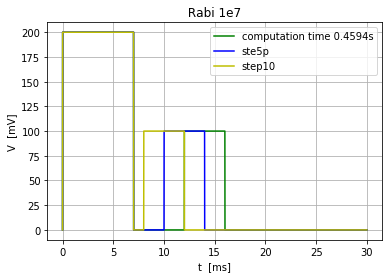

In [74]:
fig,ax= plt.subplots()

ax.grid(True)


ax.plot(timm,pol,'-g',label= 'computation time {tim:.4f}s'.format(tim = comptime))
ax.plot(timm,pol1,'-b',label= 'ste5p')
ax.plot(timm,pol2,'-y',label= 'step10')
ax.set_ylabel('V  [mV]')
ax.set_xlabel('t  [ms]')

ax.set_title(' Rabi 1e7 ')

ax.legend(loc=0)
plt.show()
#fig.savefig('PulseSequence_5ms_125Mhz_step2',optimize=True,bbox_inches='tight')

In [62]:
L=np.array([sweepslice(Pulse,10,2,15,10000000) for Pulse in Pulses_List])
M=np.sum(L,0)

In [58]:
L

array([[  0., 200., 200., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [61]:
np.sum(L,0)

array([  0., 200., 200., ...,   0.,   0.,   0.])

In [64]:
L.shape

(2, 10000000)

In [57]:
pulsescheme = np.add(L[0],L[1])

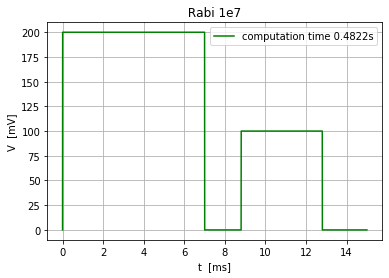

In [63]:
fig,ax= plt.subplots()

ax.grid(True)


ax.plot(timm,M,'-g',label= 'computation time {tim:.4f}s'.format(tim = comptime))
ax.set_ylabel('V  [mV]')
ax.set_xlabel('t  [ms]')

ax.set_title(' Rabi 1e7 ')

ax.legend(loc=0)
plt.show()
#fig.savefig('PulseSequence_5ms_125Mhz_step2',optimize=True,bbox_inches='tight')

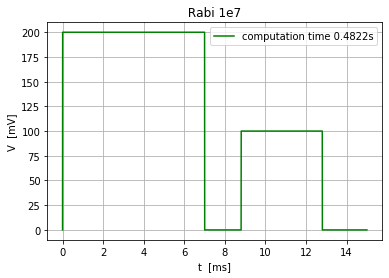

In [54]:
fig,ax= plt.subplots()

ax.grid(True)


ax.plot(timm,pulsescheme,'-g',label= 'computation time {tim:.4f}s'.format(tim = comptime))
ax.set_ylabel('V  [mV]')
ax.set_xlabel('t  [ms]')

ax.set_title(' Rabi 1e7 ')

ax.legend(loc=0)
plt.show()
#fig.savefig('PulseSequence_5ms_125Mhz_step2',optimize=True,bbox_inches='tight')

In [53]:
pulsescheme

array([  0., 200., 200., ...,   0.,   0.,   0.])

In [20]:
start = time.time()

pulse, timee = sweepslice(Rabi,10,2,15,10000000)

end = time.time()

comptim= end -start

In [21]:
comptim

0.14557623863220215

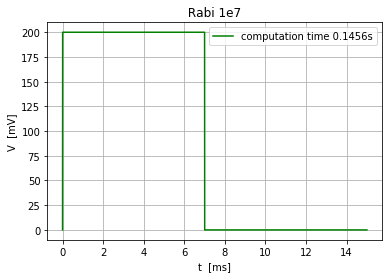

In [22]:
fig,ax= plt.subplots()

ax.grid(True)


ax.plot(timee,pulse,'-g',label= 'computation time {tim:.4f}s'.format(tim = comptim))
ax.set_ylabel('V  [mV]')
ax.set_xlabel('t  [ms]')

ax.set_title(' Rabi 1e7 ')

ax.legend(loc=0)
plt.show()
#fig.savefig('PulseSequence_5ms_125Mhz_step2',optimize=True,bbox_inches='tight')

In [24]:
seq_duration = 30.0 # in sec

pulse_duration = 5.0 # in sec

pulse_start_time = 1.0 # in sec

amplitude = 25.0 # in meV



points = int(100)

timex = np.linspace(0, seq_duration, points)

pulse = np.zeros(points)

# print(len(pulse))



pulse_start_point = int(points/seq_duration * pulse_start_time)

pulse_end_point = int(points/seq_duration * (pulse_start_time+pulse_duration))



pulse[pulse_start_point:pulse_end_point] = amplitude

In [25]:
pulse_start_point

3

In [26]:
pulse_end_point

20

In [27]:
points

100

In [28]:
pulse

array([ 0.,  0.,  0., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25.,
       25., 25., 25., 25., 25., 25., 25.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [40]:
N=100
t=15

100/15

6.666666666666667

Faster

In [3]:
def sweepfast(Pulse,P,p,t,N):
    
    """Sweeping function for a single pulse with respect of time and duration.

    This function takes the Amplitude, Start and End time, Start and End and Duration of the Pulse dictionary.
    Given a total number of points P, it calcultes the time step dt and the duration step dτ depending on 
    the values of 'Sweep Duration' and 'Sweep time' keys. 
    It then calculates the pulse shape up to the given p point at a time t.
    
    If both of the sweeping keys are equal to zero, it just gives the puls shape at 'Starting time' with 'Starting Duration' at     time t
    """
    time=np.linspace(1e-10,t,N)
    pul=np.zeros(N)

    if 0 <= p <= P:
        
        if Pulse['Sweep time'] == 0:
            dt = 0

        #Sweeping with respect to time
        if Pulse['Sweep time'] == 1:
            dt = (Pulse['End time'] - Pulse['Start time'])/P
            

        if Pulse['Sweep Duration'] == 0:
            dτ = 0

        #Sweeping with respect to Duration
        if Pulse['Sweep Duration'] == 1:
            dτ = (Pulse['End Duration'] - Pulse['Start Duration'])/P
            


        new_start, new_duration = p * dt + Pulse['Start time'], p * dτ + Pulse['Start Duration']
        new_end = new_duration + new_start
    
        pulstart = int(N/t * new_start)
        pulend = int(N/t * new_end)
        pul[pulstart:pulend] = Pulse['Amplitude'] 

          
        return pul, time
    
    else:
        print('p must be in the interval',[0,P])

In [4]:
start = time.time()

pulse, timee = sweepfast(Rabi,10,2,15,10000000)

end = time.time()

comptim= end -start

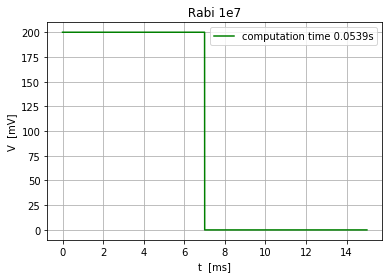

In [5]:
fig,ax= plt.subplots()

ax.grid(True)


ax.plot(timee,pulse,'-g',label= 'computation time {tim:.4f}s'.format(tim = comptim))
ax.set_ylabel('V  [mV]')
ax.set_xlabel('t  [ms]')

ax.set_title(' Rabi 1e7 ')

ax.legend(loc=0)
plt.show()
#fig.savefig('PulseSequence_5ms_125Mhz_step2',optimize=True,bbox_inches='tight')

In [3]:
tiwme = np.linspace(-1e-10,15,30)

In [4]:
len(tiwme)

30

In [5]:
a=np.zeros(30)

In [6]:
len(a)

30